# Iris Dataset
![Iris Project](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

### Import needed modules and set some global options

In [1]:
import keras
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib.patches import Patch

import time

# this makes numpy suppress some scientific notation outputs
np.set_printoptions(suppress=True)

# seed the random number generator for (somewhat) reproducible results
np.random.seed(137)

Using TensorFlow backend.


### Input data looks like this (measurements in cm):

Sepal Length | Sepal Width | Petal Length | Petal Width | Class
--- | --- | --- | --- | ---
5.1 | 3.5 | 1.4 | 0.2 | 0
4.9 | 3.0 | 1.4 | 0.2 | 0
4.7 | 3.2 | 1.3 | 0.2 | 0

#### Classes: 0 = Iris Setosa, 1 = Iris Versicolor, 2 = Iris Virginica

In the input file the values are comma-separated:
`5.1,3.5,1.4,0.2,0`

https://archive.ics.uci.edu/ml/datasets/iris

### Load the dataset from disk

In [2]:
iris_data = np.loadtxt('iris.data.int', delimiter=',')

In [3]:
iris_data.shape

(150, 5)

In [4]:
iris_data[0:3]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ]])

### Visualize Linear Separability

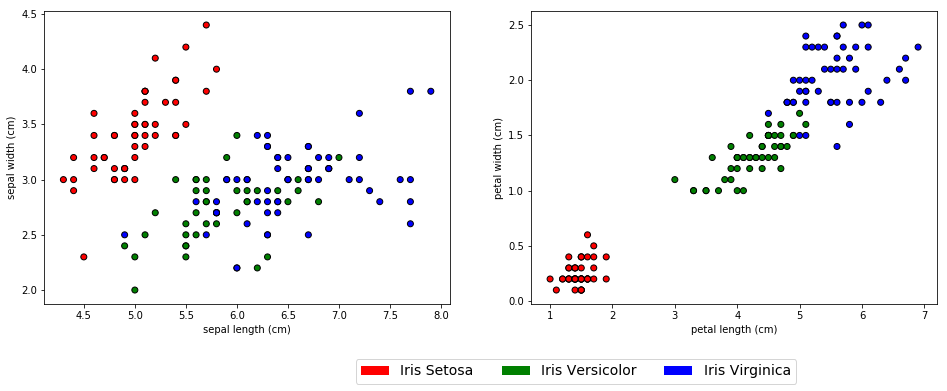

In [5]:
colors = [ 'red', 'green', 'blue' ]

fig, ax = plt.subplots(figsize=(16, 6))

ax1 = plt.subplot2grid((1, 2), (0, 0))
ax1.scatter(iris_data[:, 0], iris_data[:, 1], edgecolors='black', c=[colors[int(x)] for x in iris_data[:, 4]])
ax1.set_xlabel('sepal length (cm)')
ax1.set_ylabel('sepal width (cm)')

ax2 = plt.subplot2grid((1, 2), (0, 1))
ax2.scatter(iris_data[:, 2], iris_data[:, 3], edgecolors='black', c=[colors[int(x)] for x in iris_data[:, 4]])
ax2.set_xlabel('petal length (cm)')
ax2.set_ylabel('petal width (cm)')

labels = [ Patch(facecolor='red'), Patch(facecolor='green'), Patch(facecolor='blue') ]
fig.legend(labels, ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica'],
           loc='lower center', bbox_to_anchor=(.5, 0), fontsize=14, ncol=3)

fig.subplots_adjust(bottom=0.2)

plt.show()

### Slice 45 of each type of iris for training data

In [6]:
train_data = iris_data[0:45]
train_data = np.append(train_data, iris_data[50:95], axis=0)
train_data = np.append(train_data, iris_data[100:145], axis=0)
train_data.shape

(135, 5)

### Slice 5 of each type for test data

In [7]:
test_data = iris_data[45:50]
test_data = np.append(test_data, iris_data[95:100], axis=0)
test_data = np.append(test_data, iris_data[145:150], axis=0)
test_data.shape

(15, 5)

In [8]:
test_data

array([[4.8, 3. , 1.4, 0.3, 0. ],
       [5.1, 3.8, 1.6, 0.2, 0. ],
       [4.6, 3.2, 1.4, 0.2, 0. ],
       [5.3, 3.7, 1.5, 0.2, 0. ],
       [5. , 3.3, 1.4, 0.2, 0. ],
       [5.7, 3. , 4.2, 1.2, 1. ],
       [5.7, 2.9, 4.2, 1.3, 1. ],
       [6.2, 2.9, 4.3, 1.3, 1. ],
       [5.1, 2.5, 3. , 1.1, 1. ],
       [5.7, 2.8, 4.1, 1.3, 1. ],
       [6.7, 3. , 5.2, 2.3, 2. ],
       [6.3, 2.5, 5. , 1.9, 2. ],
       [6.5, 3. , 5.2, 2. , 2. ],
       [6.2, 3.4, 5.4, 2.3, 2. ],
       [5.9, 3. , 5.1, 1.8, 2. ]])

### Separate the training data into X and y sets

In [9]:
train_X = train_data[:, 0:4]
train_y = train_data[:, 4]

### Do the same with the test data

In [10]:
test_X = test_data[:, 0:4]
test_y = test_data[:, 4]

### One hot encode the training and testing y sets

In [11]:
train_y_1h = keras.utils.np_utils.to_categorical(train_y)
test_y_1h = keras.utils.np_utils.to_categorical(test_y)
test_y_1h

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

### Define the model

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

### Compile the model

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train using the training data X and y sets

In [14]:
t1 = time.time()
fit = model.fit(train_X, train_y_1h, epochs=100, batch_size=10, validation_data=(test_X, test_y_1h))
t2 = time.time()

Train on 135 samples, validate on 15 samples
Epoch 1/100
135/135 [==============================] - 0s 1ms/step - loss: 1.0490 - acc: 0.4222 - val_loss: 1.0429 - val_acc: 0.3333
Epoch 2/100
135/135 [==============================] - 0s 96us/step - loss: 1.0160 - acc: 0.4889 - val_loss: 1.0151 - val_acc: 0.3333
Epoch 3/100
135/135 [==============================] - 0s 96us/step - loss: 0.9868 - acc: 0.5185 - val_loss: 0.9875 - val_acc: 0.4000
Epoch 4/100
135/135 [==============================] - 0s 87us/step - loss: 0.9573 - acc: 0.5481 - val_loss: 0.9598 - val_acc: 0.4667
Epoch 5/100
135/135 [==============================] - 0s 97us/step - loss: 0.9285 - acc: 0.5778 - val_loss: 0.9320 - val_acc: 0.5333
Epoch 6/100
135/135 [==============================] - 0s 105us/step - loss: 0.8990 - acc: 0.6148 - val_loss: 0.9023 - val_acc: 0.5333
Epoch 7/100
135/135 [==============================] - 0s 123us/step - loss: 0.8689 - acc: 0.6519 - val_loss: 0.8718 - val_acc: 0.6000
Epoch 8/100
135/

135/135 [==============================] - 0s 99us/step - loss: 0.2460 - acc: 0.9037 - val_loss: 0.2240 - val_acc: 0.8667
Epoch 62/100
135/135 [==============================] - 0s 106us/step - loss: 0.2426 - acc: 0.9037 - val_loss: 0.2351 - val_acc: 0.8667
Epoch 63/100
135/135 [==============================] - 0s 102us/step - loss: 0.2395 - acc: 0.9111 - val_loss: 0.2207 - val_acc: 0.8667
Epoch 64/100
135/135 [==============================] - 0s 100us/step - loss: 0.2404 - acc: 0.9185 - val_loss: 0.2055 - val_acc: 0.9333
Epoch 65/100
135/135 [==============================] - 0s 109us/step - loss: 0.2407 - acc: 0.9111 - val_loss: 0.2850 - val_acc: 0.8000
Epoch 66/100
135/135 [==============================] - 0s 108us/step - loss: 0.2302 - acc: 0.9259 - val_loss: 0.1813 - val_acc: 0.9333
Epoch 67/100
135/135 [==============================] - 0s 111us/step - loss: 0.2294 - acc: 0.9185 - val_loss: 0.2143 - val_acc: 0.8667
Epoch 68/100
135/135 [==============================] - 0s 107

In [15]:
print("Elapsed time: %.2fs" % (t2 - t1))

Elapsed time: 2.08s


### Evaluate the model against the test data set

In [16]:
results = model.evaluate(test_X, test_y_1h)
print("\nLoss: %.2f%%, Accuracy: %.2f%%" % (results[0]*100, results[1]*100))

15/15 [==============================] - 0s 61us/step

Loss: 11.13%, Accuracy: 100.00%


### Show predictions for the test data set

In [17]:
predictions = model.predict(test_X)
print(predictions)
print(np.round(predictions, 2)*100)

[[0.99753654 0.00246341 0.        ]
 [0.99979144 0.00020853 0.        ]
 [0.99910766 0.00089232 0.        ]
 [0.9997893  0.00021069 0.        ]
 [0.99935526 0.0006447  0.        ]
 [0.00856104 0.96950793 0.02193101]
 [0.00392343 0.9600899  0.03598667]
 [0.0017402  0.9785769  0.01968297]
 [0.04201483 0.9574068  0.00057826]
 [0.0029622  0.9658486  0.03118925]
 [0.0000092  0.43673673 0.5632541 ]
 [0.00000044 0.05379853 0.9462011 ]
 [0.00001423 0.28999338 0.70999235]
 [0.00006304 0.3151255  0.6848115 ]
 [0.00002559 0.13331306 0.86666137]]
[[100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [  1.  97.   2.]
 [  0.  96.   4.]
 [  0.  98.   2.]
 [  4.  96.   0.]
 [  0.  97.   3.]
 [  0.  44.  56.]
 [  0.   5.  95.]
 [  0.  29.  71.]
 [  0.  32.  68.]
 [  0.  13.  87.]]


In [18]:
print(np.round(predictions))

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


### Graph the model's loss and accuracy:

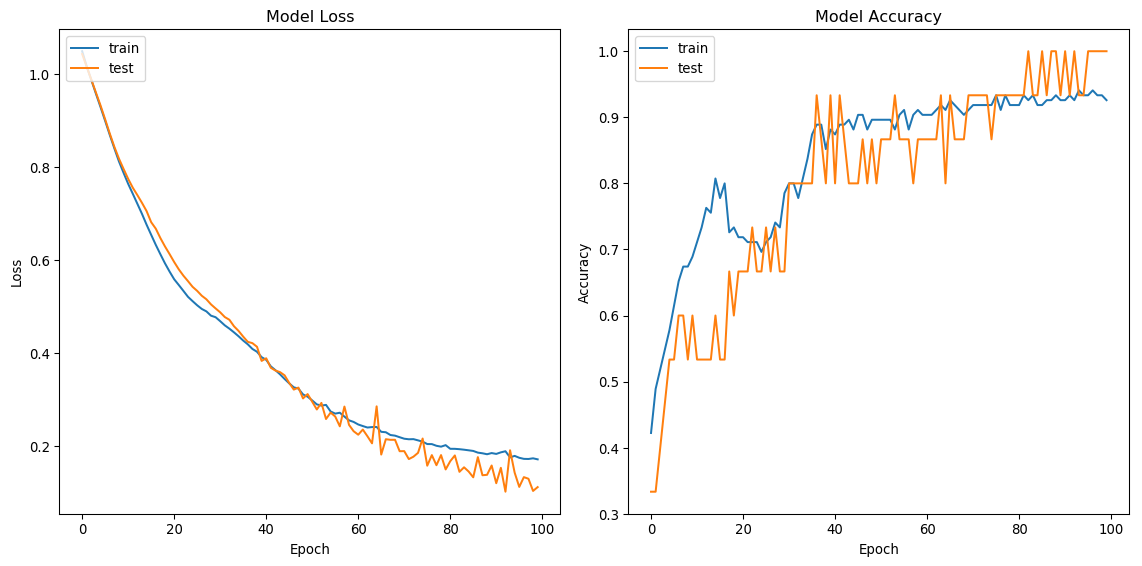

In [19]:
plt.figure(figsize=(12, 6), dpi=96)
plt.subplot(1, 2, 1)
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()